# Index number:- 190521G
## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

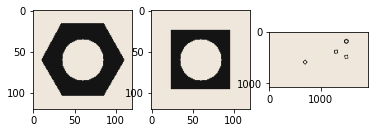

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Materials\hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Materials\squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Materials\conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### 1) Otsu's thresholding

Hexnut_template Threshold = 121.0
Squarenut_template Threshold = 121.0
Conveyor_f100 Threshold = 124.0


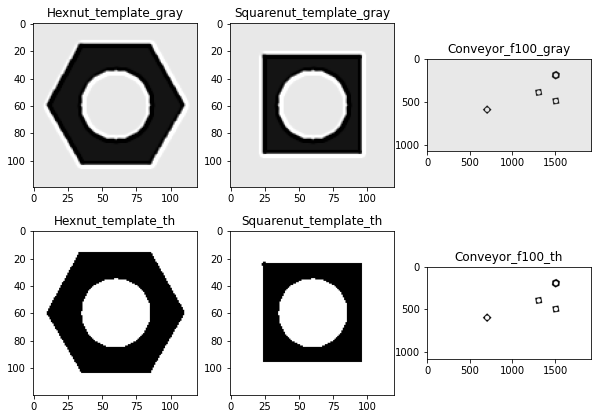

In [3]:
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32)

hexnut_template_gray = cv.filter2D(cv.GaussianBlur(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY),(5,5),0), -1, kernel)
squarenut_template_gray = cv.filter2D(cv.GaussianBlur(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY),(5,5),0), -1, kernel)
conveyor_f100_gray = cv.filter2D(cv.GaussianBlur(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY),(5,5),0), -1, kernel)

ret_1,hexnut_template_th = cv.threshold(hexnut_template_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
ret_2,squarenut_template_th = cv.threshold(squarenut_template_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
ret_3,conveyor_f100_th = cv.threshold(conveyor_f100_gray,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)

fig, ax = plt. subplots(2,3, figsize= (10,7))
images = [[hexnut_template_gray,squarenut_template_gray,conveyor_f100_gray],[hexnut_template_th,squarenut_template_th,conveyor_f100_th]]
Titles = [['Hexnut_template_gray','Squarenut_template_gray','Conveyor_f100_gray'],['Hexnut_template_th','Squarenut_template_th','Conveyor_f100_th']]
Th_values = [ret_1,ret_2,ret_3]

for c in range(3):
    ax[0,c].imshow(images[0][c],'gray')
    ax[0,c].set_title(Titles[0][c])
    ax[1,c].imshow(images[1][c],'gray')
    ax[1,c].set_title(Titles[1][c])
    print(Titles[1][c][:-3]+' Threshold = '+str(Th_values[c]))
plt.show()


### 2) Morphological closing

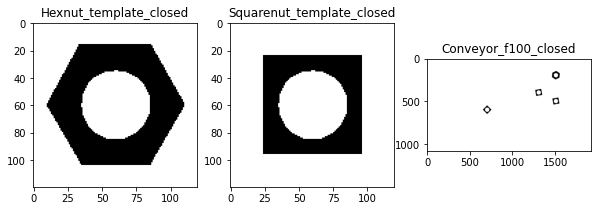

In [4]:
# morphological closing

Closed_images=[]
Closed_titles=['Hexnut_template_closed','Squarenut_template_closed','Conveyor_f100_closed']
kernel_1=np.ones((3,3), np.uint8)
for i in range(3):
    Closed_images.append(cv.morphologyEx(images[1][i], cv.MORPH_CLOSE, kernel_1))

fig, ax = plt. subplots(1,3, figsize= (10,5))
for c in range(3):
    ax[c].imshow(Closed_images[c],'gray')
    ax[c].set_title(Closed_titles[c])
plt.show()


### 3)Connected components

No of connected components:-3
Statistics:- [[  10   16  100   88 4723]
 [   0    0  120  120 7715]
 [  35   35   50   50 1962]]
Centriods:- [[59.53927588 59.11052297]
 [59.41801685 59.68049255]
 [59.72782875 59.72782875]]

No of connected components:-3
Statistics:- [[  24   24   72   72 3222]
 [   0    0  120  120 9216]
 [  35   35   50   50 1962]]
Centriods:- [[59.36126629 59.36126629]
 [59.5        59.5       ]
 [59.72782875 59.72782875]]

No of connected components:-6
Statistics:- [[    651     150     895     500   13932]
 [      0       0    1920    1080 2051820]
 [   1475     175      50      50    1962]
 [   1275     375      50      50    1962]
 [   1475     475      50      50    1962]
 [    675     575      50      50    1962]]
Centriods:- [[1274.92219351  399.81754235]
 [ 956.24816992  540.88744529]
 [1499.72782875  199.72782875]
 [1299.72782875  399.72782875]
 [1499.72782875  499.72782875]
 [ 699.72782875  599.72782875]]



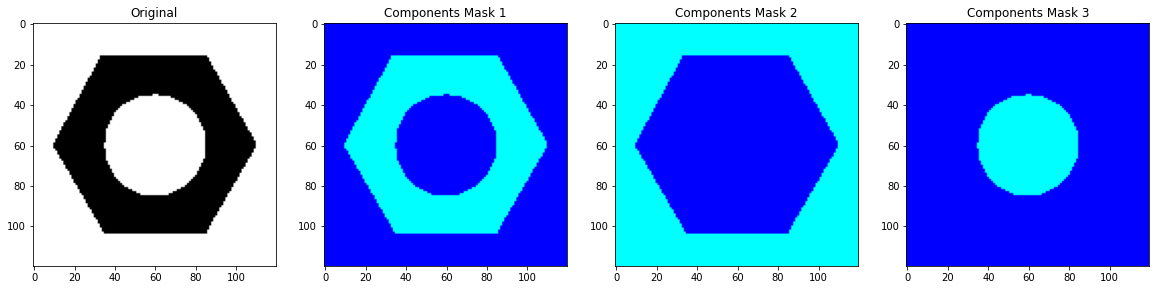

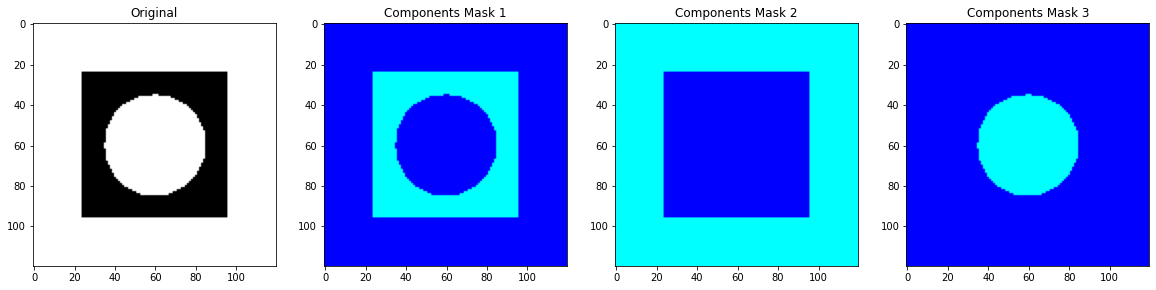

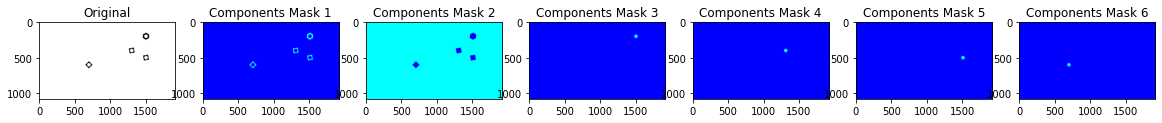

In [5]:
# Connected components
# https://www.geeksforgeeks.org/python-opencv-connected-component-labeling-and-analysis/

Connected_components_list=[]

for i in range(3):
    img_list=[] # to add the original image and the connected components
    img= Closed_images[i]
    img_list.append(img)
    (Total_labels, Label_ids, values, centriod)= cv.connectedComponentsWithStats(img,4,cv.CV_32S)
    #out_image = np.zeros(img.shape, dtype= "uint8")   ## can add a super positioned img

    fig, ax = plt.subplots(1,Total_labels+1, figsize =(20,5))
    ax[0].imshow(img,'gray')
    ax[0].set_title("Original")

    for u in range(0,Total_labels): 
        #area =values[u, cv.CC_STAT_AREA]    #component area
        # add condition to filter the components, if want
        components_mask = (Label_ids==u).astype("uint8")*255
        img_list.append(components_mask)
        components_mask = cv.applyColorMap(components_mask, cv.COLORMAP_AUTUMN)

        ax[u+1].imshow(components_mask)#,'gray')
        ax[u+1].set_title("Components Mask "+str(u+1))

    Connected_components_list.append(img_list)

    print("No of connected components:-"+ str(Total_labels))
    print("Statistics:- " + str(values) )
    print("Centriods:- " + str(centriod) + "\n")
    cv.waitKey()

### 4) Finding contours

Text(0.5, 1.0, 'Component mask 2')

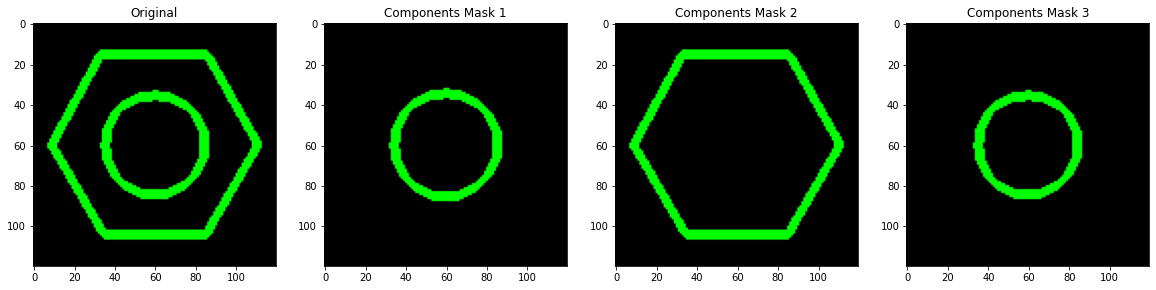

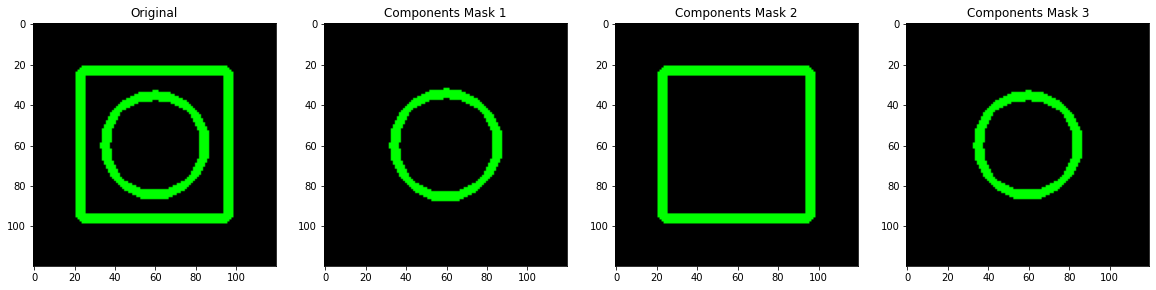

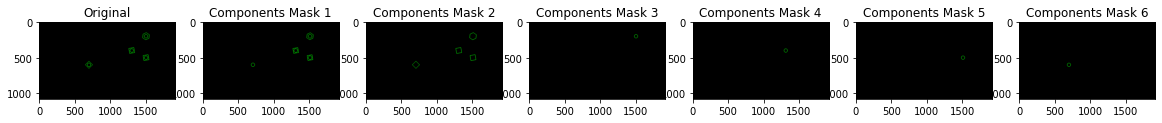

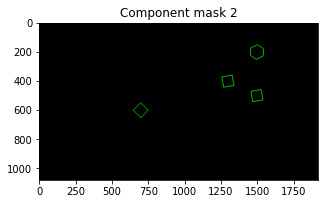

In [6]:
# Finding contours
########   Must extract the boundaries only (in component 2 of conveyor_f100)

Extreme_outer_contours = []
Contours_list=[] # contours of the main image and its components 

for i in range(3):
    contours_of_a_category =[]    # list that will include the contoures corresponding to the components of a image out of 3 main categories (images)
    fig, ax = plt.subplots(1,len(Connected_components_list[i]), figsize=(20,5))
    for u in range(len(Connected_components_list[i])):
        img = Connected_components_list[i][u]
        contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        contours_of_a_category.append(contours)

        img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
        img = np.ones(img.shape, dtype= "uint8")*255
        #ax[u].imshow(cv.cvtColor(cv.drawContours(img, contours, -1, (0,255,255), 1), cv.COLOR_RGB2BGR ))
        im = np.zeros(img.shape, dtype= "uint8")
        for a in range(len(contours)):
            if (len(contours)==1):
                im= cv.drawContours(im, contours, 0, (0,255,0), 3)
            elif (a!=0):
                im = np.bitwise_or(cv.drawContours(im, contours, a, (0,255,0), 3), im)

        ax[u].imshow(im)

        if (u==0):
            ax[u].set_title("Original")
        else:
            ax[u].set_title("Components Mask "+str(u))
        
        if (u==2):
            Extreme_outer_contours.append(contours[1])  # appending outer border contour of hexnut_template ,squarenut_template andconveyer component 2

        if (i==2) & (u==2): # getting the conveyer image with the object boudaries
            conveyor_contoures = im
    Contours_list.append(contours_of_a_category)
    
    cv.waitKey()
# ploting the conveyer with object contours
fig, ax_1 = plt.subplots(1,1, figsize =(5,5))
ax_1.imshow(conveyor_contoures)
ax_1.set_title("Component mask 2")

    


# Detecting Objects on a Synthetic Conveyor

### 1) Opening video 

In [7]:
# Opening video

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'Materials\conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### 2) Counting the number of matching hexagonal nuts in "conveyor_f100.png"

In [8]:
def match(img, contour):
    num=0
    thresh = 0.01
    (Total_labels, Label_ids, values, centriod)= cv.connectedComponentsWithStats(img,4,cv.CV_32S)
    component = (Label_ids==1).astype("uint8")*255
    contours, hierarchy = cv.findContours(component, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    for i in range(len(contours)):
        #print(cv.matchShapes(contours[i],contour,1,0.0))
        if (cv.matchShapes(contours[i],contour,1,0.0)< thresh):
            num+=1
    return(num)

Hex num = 1
Square num = 3


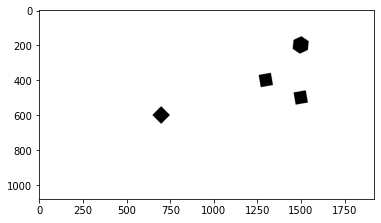

In [9]:
conveyer_f100 = Closed_images[2]
(Total_labels, Label_ids, values, centriod)= cv.connectedComponentsWithStats(conveyer_f100,4,cv.CV_32S)

component = (Label_ids==1).astype("uint8")*255

fig = plt.imshow(component,'gray')
print("Hex num = " + str(match(component,Extreme_outer_contours[0])))
print("Square num = "+str(match(component,Extreme_outer_contours[1])))

### 3) Count objects in the conveyer belt

In [12]:
def get_component_img(frame):
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret,frame = cv.threshold(frame,0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
    #Morphological closing
    kernel_1=np.ones((3,3), np.uint8)
    frame= cv.morphologyEx(frame, cv.MORPH_CLOSE, kernel_1)
    #connected components
    (Total_labels, Label_ids, values, centriod)= cv.connectedComponentsWithStats(frame,4,cv.CV_32S)
    component = (Label_ids==1).astype("uint8")*255

    return (component)
    

Can't receive frame (stream end?). Exiting.


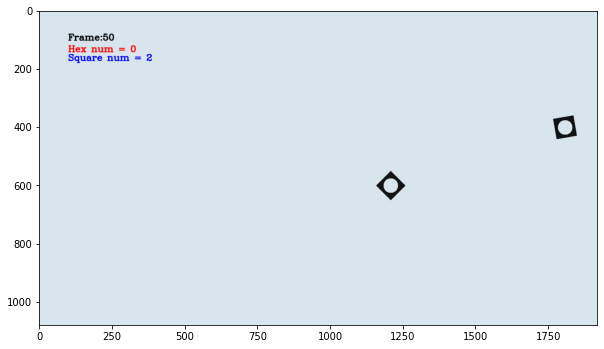

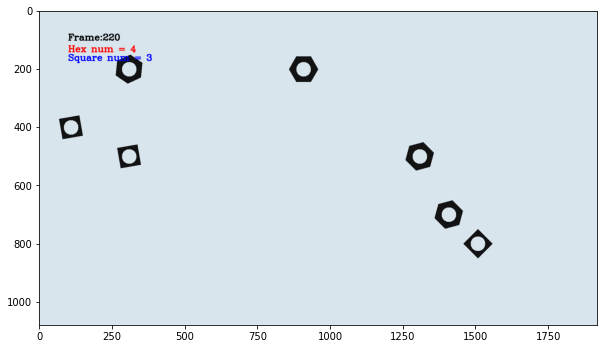

In [13]:
# opening video
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'Materials\conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    component= get_component_img(frame)
    hex_num = match(component, Extreme_outer_contours[0])
    sq_num = match(component, Extreme_outer_contours[1])

    f += 1
    text_1 = 'Frame:' + str(f)
    text_2 = "Hex num = " + str(hex_num)
    text_3 = "Square num = " + str(sq_num)
    cv.putText(frame,text_1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    cv.putText(frame,text_2 , (100, 140), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2, cv.LINE_AA)
    cv.putText(frame,text_3 , (100, 170), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2, cv.LINE_AA)
    
    cv.imshow('Conveyor', frame)
    if (f==220 or f==50):
        plt.figure(figsize=(10,10))
        plt.imshow(frame)
        
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()